<a href="https://colab.research.google.com/github/safi50/Deep-Learning/blob/main/PyTorch_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## Creating Data Set For Linear Regression

In [ ]:
# Formula : Y = b + w * x
weight = 0.7
bias = 0.3
# Input Data  - 100 Values
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
# Output Data
Y = bias + weight * X

X[:5] , Y[:5]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

## Creating a 80 - 20 Training Testing Split

In [ ]:
split =  int(0.8 *  len(X))

X_train = X[:split]
X_test = X[split:]

Y_train = Y[:split]
Y_test = Y[split:]

len(X_train), len(X_test) , len(Y_train) , len(Y_test)

(40, 10, 40, 10)

## Function to plot predictions

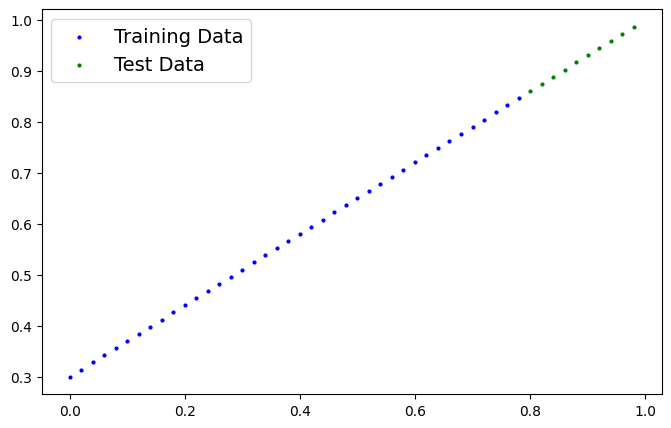

In [ ]:
def plot_predictions(train_data = X_train, train_labels=Y_train,
                     test_data = X_test, test_labels=Y_test,
                     predictions = None):
  plt.figure(figsize=(8, 5))

  plt.scatter(train_data, train_labels, c="b", s = 4 , label = "Training Data")

  plt.scatter(test_data, test_labels, c="g", s = 4 , label = "Test Data")

  if predictions is not None:
    # Plot predictions for comparison with Train and Test , If any:
    plt.scatter(test_data, predictions, c="r", s=4 , label = "Predictions")

  plt.legend(prop={"size": 14})

plot_predictions()

## Creating a Regression Model Class

In [ ]:
class LinearRegression(nn.Module):  # All models should inherit from nn.Module
  def __init__(self):
    super().__init__()

    # Creating weight and bias Parameters

    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float))
    # Override the forward method for regression
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # regression formula


## Creating a Model Instance - Loss Function and Optimizer

In [ ]:
torch.manual_seed(42)

model = LinearRegression()
#Check model parameters
list(model.parameters())
#See model parameters
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#Loss Function
loss_fn = nn.L1Loss()

#Optimizer :  SGD
optimizer = torch.optim.SGD(params = model.parameters(),
                            lr = 0.01)

## Learning Loop  + TESTING


In [ ]:
epochs = 200
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  model.train()

  Y_pred = model(X_train)   # Forward pass
  loss = loss_fn(Y_pred, Y_train)   # calculating loss
  optimizer.zero_grad()
  loss.backward()   # Back Propagation
  optimizer.step()

  # TESTING CODE
  model.eval()
  with torch.inference_mode():
    test_pred = model(X_test)
    test_loss = loss_fn(test_pred, Y_test.type(torch.float))

  if (epoch % 10) == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())

    print(f"Epoch : {epoch} | Loss : {loss} | Test Loss :  {test_loss}")


Epoch : 0 | Loss : 0.31288138031959534 | Test Loss :  0.48106518387794495
Epoch : 10 | Loss : 0.1976713240146637 | Test Loss :  0.3463551998138428
Epoch : 20 | Loss : 0.08908725529909134 | Test Loss :  0.21729660034179688
Epoch : 30 | Loss : 0.053148526698350906 | Test Loss :  0.14464017748832703
Epoch : 40 | Loss : 0.04543796554207802 | Test Loss :  0.11360953003168106
Epoch : 50 | Loss : 0.04167863354086876 | Test Loss :  0.09919948130846024
Epoch : 60 | Loss : 0.03818932920694351 | Test Loss :  0.08886633068323135
Epoch : 70 | Loss : 0.03476089984178543 | Test Loss :  0.0805937647819519
Epoch : 80 | Loss : 0.03132382780313492 | Test Loss :  0.07232122868299484
Epoch : 90 | Loss : 0.02788739837706089 | Test Loss :  0.06473556160926819
Epoch : 100 | Loss : 0.024458957836031914 | Test Loss :  0.05646304413676262
Epoch : 110 | Loss : 0.021020207554101944 | Test Loss :  0.04819049686193466
Epoch : 120 | Loss : 0.01758546568453312 | Test Loss :  0.04060482233762741
Epoch : 130 | Loss : 0.

## Checking Loss

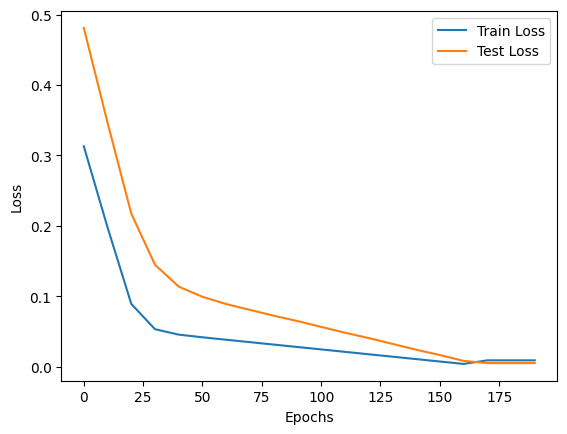

In [ ]:

plt.plot(epoch_count, train_loss_values, label = "Train Loss")
plt.plot(epoch_count, test_loss_values, label = "Test Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

## Checking Models Learnt Parameters

In [ ]:
# Learnt Model Values
print(model.state_dict())

# Original param Values :
print(f"weight: {weight} , bias: {bias}")


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
weight: 0.7 , bias: 0.3


## Making Predictions:


In [ ]:
model.eval()
with torch.inference_mode():

  y_preds = model(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

## Prediction Accuracy Graph

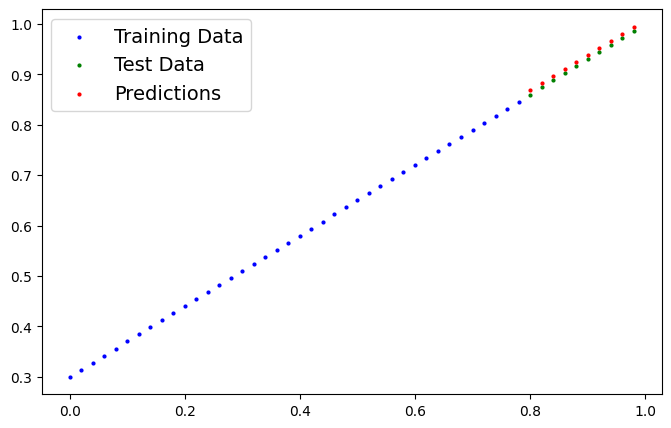

In [ ]:
plot_predictions(predictions = y_preds)

## Saving and Loading Model

### Saving

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


### Loading

In [ ]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model = LinearRegression()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>